### ANLY 590 Assignment 1
**Luwei Lei**


In [123]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale 
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [34]:
#read data
df = pd.read_csv("https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv", index_col = 0)
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [25]:
#EDA
df.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [177]:
#data preprocessing
df = df.dropna()
X = scale(df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1))
y = df['Salary'].values.reshape(-1,1)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
columns = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).columns

### Question 1.1
Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?


The three final predictors that remain in the model are **CRBI, Hits and RBI**. The optimal value of the regularization penality is 0.048740830307099095. And there are 14 predictors left in the model. 

Text(0.5, 1.0, 'Lasso Regression of coefficient trajectories')

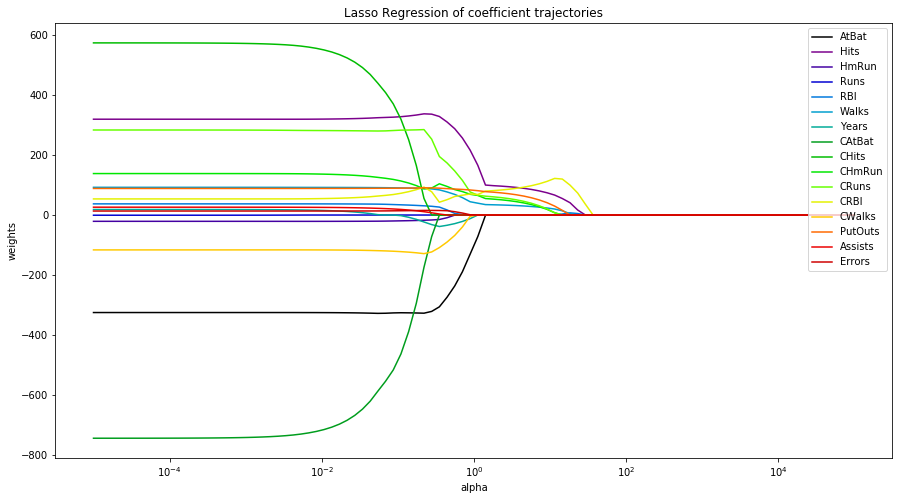

In [179]:
alphas = 10**np.linspace(5,-5,100)*0.5

lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
cm = plt.cm.nipy_spectral
ax.set_prop_cycle('color', [cm(1.*i/16) for i in range(16)])
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.legend(columns, loc = 'upper right')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso Regression of coefficient trajectories')

In [180]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(X_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

print('The optimal value of the regularization penality is', lassocv.alpha_)
print("The mean square error is", mean_squared_error(y_test, lasso.predict(X_test)))

The optimal value of the regularization penality is 0.048740830307099095
The mean square error is 133897.21033608852


In [181]:
pd.Series(lasso.coef_, index=columns)

AtBat     -325.916720
Hits       327.003872
HmRun      -19.567604
Runs        -0.000000
RBI         34.470302
Walks       90.672382
Years       -0.000000
CAtBat    -494.967041
CHits      349.041946
CHmRun     116.609217
CRuns      282.646667
CRBI        70.022377
CWalks    -121.333253
PutOuts     89.532254
Assists     19.539731
Errors      14.197799
dtype: float64

### Question 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-validation to find the optimal vaule of the regularization penalty.

The optimal value of the regularization penality is 0.013592941213664701.

Text(0.5, 1.0, 'Ridge Regression of coefficient trajectories')

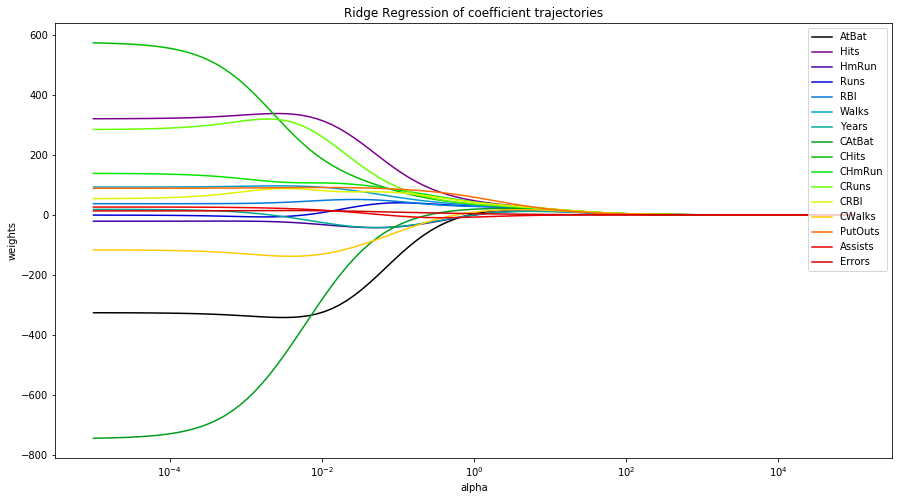

In [182]:
alphas = 10**np.linspace(5,-5,100)*0.5

ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_[0])
    
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
cm = plt.cm.nipy_spectral
ax.set_prop_cycle('color', [cm(1.*i/16) for i in range(16)])
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.legend(columns, loc = 'upper right')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge Regression of coefficient trajectories')

In [183]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)

ridge_new = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridge_new.fit(X_train, y_train)
print('The optimal value of the regularization penality is', ridgecv.alpha_)
print("The mean square error is", mean_squared_error(y_test, ridge_new.predict(X_test)))

The optimal value of the regularization penality is 0.013592941213664701
The mean square error is 131995.05066262392


In [184]:
pd.Series(ridge_new.coef_[0], index = columns)

AtBat     -266.398300
Hits       254.767225
HmRun      -40.365002
Runs        26.716730
RBI         51.310626
Walks       80.469736
Years      -39.111862
CAtBat    -142.497848
CHits      127.083770
CHmRun     101.414281
CRuns      179.288713
CRBI        76.679642
CWalks    -106.044107
PutOuts     90.301433
Assists      8.249613
Errors      12.256112
dtype: float64

### Question 2
Short Answer. Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

The bias measures how well the model fits the training data and the variance refers to how the predictions that the model made vary on different set of data. And the bias-variance tradeoff balances the variance and bias by leveraging the model complexity. The high bias and low variance will often result an underfitting model and the low bias and high variance will lead to overfit.<br>
The regularization adds penalty to the coefficients to avoid the coefficients get to large and result overfitting. As the plots shown above, when the penalty term alpha gets larger, the coefficients of parameters are getting closer and closer to 0, which result higher bias and lower variance. 